# Performance Comparison between custom KMeans and Scikit-learn KMeans

# Scikit-learn KMeans

In [2]:
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

C:\Users\41811\AppData\Local\Temp\ipykernel_5036\1456041742.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
X, cluster_assignments = make_blobs(n_samples=700, centers=4, cluster_std=0.60, random_state=0)

In [5]:
df = pd.DataFrame(X, columns=['Feature1', 'Feature2'])

In [6]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df)

KMeans(n_clusters=4)

In [75]:
kmeans.cluster_centers_

array([[-1.49970942,  2.90574194],
       [ 1.9877063 ,  0.83188579],
       [-1.20405793,  7.83785843],
       [ 0.90043932,  4.32217464]])

In [49]:
kmeans.labels_

array([0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 3, 2, 0, 2, 1, 3, 3, 0, 2, 0, 2, 2,
       1, 2, 1, 0, 3, 1, 1, 1, 1, 3, 0, 3, 2, 0, 0, 2, 2, 3, 3, 2, 2, 1,
       2, 0, 0, 3, 0, 2, 3, 0, 3, 3, 3, 1, 2, 0, 3, 2, 1, 2, 1, 1, 0, 3,
       2, 1, 2, 2, 0, 2, 0, 0, 2, 1, 1, 3, 3, 3, 1, 1, 1, 2, 2, 0, 3, 1,
       3, 1, 0, 0, 3, 0, 0, 0, 1, 2, 0, 0, 0, 2, 1, 1, 2, 2, 2, 3, 3, 1,
       2, 3, 3, 2, 3, 3, 0, 0, 1, 1, 3, 2, 1, 0, 1, 0, 0, 1, 2, 0, 3, 0,
       1, 2, 3, 0, 0, 1, 3, 3, 1, 3, 2, 2, 1, 2, 1, 0, 1, 2, 3, 1, 3, 2,
       3, 0, 0, 2, 3, 1, 0, 3, 3, 1, 0, 0, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2,
       3, 2, 3, 3, 2, 0, 1, 0, 2, 1, 1, 1, 1, 2, 1, 0, 2, 3, 3, 0, 1, 1,
       1, 3, 2, 2, 2, 0, 3, 3, 1, 1, 2, 0, 2, 0, 1, 0, 3, 3, 3, 0, 2, 2,
       3, 0, 2, 0, 0, 1, 3, 2, 2, 3, 0, 0, 0, 0, 3, 1, 0, 2, 2, 0, 3, 0,
       0, 3, 3, 2, 2, 3, 2, 1, 1, 1, 0, 2, 1, 3, 0, 3, 0, 0, 0, 1, 3, 1,
       1, 0, 0, 3, 1, 3, 3, 3, 1, 2, 3, 1, 3, 0, 3, 2, 2, 2, 3, 0, 3, 3,
       2, 0, 0, 2, 2, 1, 2, 2, 0, 3, 2, 0, 1, 3, 3,

In [50]:
from sklearn.metrics import homogeneity_score

homogeneity = homogeneity_score(cluster_assignments, kmeans.labels_)
homogeneity 

0.9936442712074952

<Axes: xlabel='Feature1', ylabel='Feature2'>

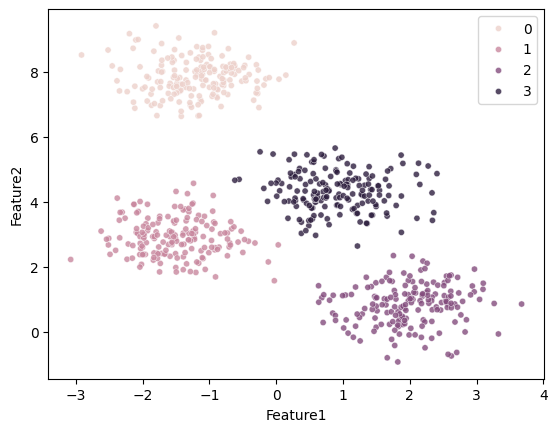

In [51]:
import seaborn as sns

sns.scatterplot(data=df, x=df.Feature1, y=df.Feature2, hue=kmeans.labels_, s=20, alpha=0.8)

In [7]:
# Next we can also calculate the Sciki-learn kmeans inertia which is the sim of distance square
# we can see this inertia is 473 is a relatively low values which indicate bettwe clusters that are more dense and well seperated
kmeans.inertia_

473.83175533019596

In [10]:
# next we can try to figure out for Sciki-learn the optimal K values to best fitting the data into model
inertias = pd.DataFrame(data=[], index=range(2, 20), columns=['inertia'])
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    inertias.loc[k] = kmeans.inertia_
inertias

,inertia
2,2661.463912
3,1153.130295
4,473.831755
5,422.800532
6,389.160494
7,360.918815
8,318.448471
9,285.988654
10,258.216776
11,226.436737


<Axes: title={'center': 'Inertia vs. K Values'}, xlabel='k values', ylabel='inertia'>

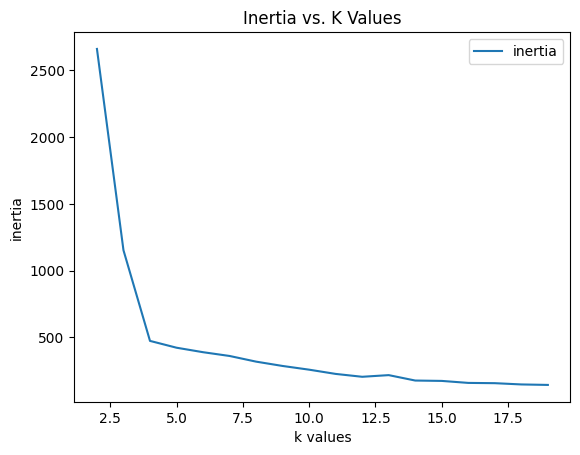

In [13]:
inertias.plot(title='Inertia vs. K Values', xlabel='k values', ylabel='inertia')
## from this inertia vs. K values graph we can see about after running Kmeans algorigthms 4 times, we have find our optimal clusters locations

# Custom KMeans

In [14]:
from KMeans import KMeans1

X, cluster_assignments = make_blobs(n_samples=700, centers=4, cluster_std=0.60, random_state=0)

In [15]:
kmeans = KMeans1(k=4)

In [16]:
clusters, centroids = kmeans.fit(X)

In [55]:
centroids

[[-1.4997094181421273, 2.905741940858995],
 [1.9877063026473274, 0.8318857877497887],
 [-1.2040579337244177, 7.837858432492295],
 [0.9004393234899268, 4.32217463716]]

In [40]:
clusters

array([2, 2, 3, 2, 3, 2, 3, 3, 3, 2, 1, 3, 2, 3, 0, 1, 1, 2, 3, 2, 3, 3,
       0, 3, 0, 2, 1, 0, 0, 0, 0, 1, 2, 1, 3, 2, 2, 3, 3, 1, 1, 3, 3, 0,
       3, 2, 2, 1, 2, 3, 1, 2, 1, 1, 1, 0, 3, 2, 1, 3, 0, 3, 0, 0, 2, 1,
       3, 0, 3, 3, 2, 3, 2, 2, 3, 0, 0, 1, 1, 1, 0, 0, 0, 3, 3, 2, 1, 0,
       1, 0, 2, 2, 1, 2, 2, 2, 0, 3, 2, 2, 2, 3, 0, 0, 3, 3, 3, 1, 1, 0,
       3, 1, 1, 3, 1, 1, 2, 2, 0, 0, 1, 3, 0, 2, 0, 2, 2, 0, 3, 2, 1, 2,
       0, 3, 1, 2, 2, 0, 1, 1, 0, 1, 3, 3, 0, 3, 0, 2, 0, 3, 1, 0, 1, 3,
       1, 2, 2, 3, 1, 0, 2, 1, 1, 0, 2, 2, 3, 0, 0, 3, 3, 3, 3, 0, 0, 3,
       1, 3, 1, 1, 3, 2, 0, 2, 3, 0, 0, 0, 0, 3, 0, 2, 3, 1, 1, 2, 0, 0,
       0, 1, 3, 3, 3, 2, 1, 1, 0, 0, 3, 2, 3, 2, 0, 2, 1, 1, 1, 2, 3, 3,
       1, 2, 3, 2, 2, 0, 1, 3, 3, 1, 2, 2, 2, 2, 1, 0, 2, 3, 3, 2, 1, 2,
       2, 1, 1, 3, 3, 1, 3, 0, 0, 0, 2, 3, 0, 1, 2, 1, 2, 2, 2, 0, 1, 0,
       0, 2, 2, 1, 0, 1, 1, 1, 0, 3, 1, 0, 1, 2, 1, 3, 3, 3, 1, 2, 1, 1,
       3, 2, 2, 3, 3, 0, 3, 3, 2, 1, 3, 2, 0, 1, 1,

In [76]:
homogeneity = homogeneity_score(cluster_assignments, clusters)
homogeneity 

0.9936442712074952

<Axes: xlabel='Feature1', ylabel='Feature2'>

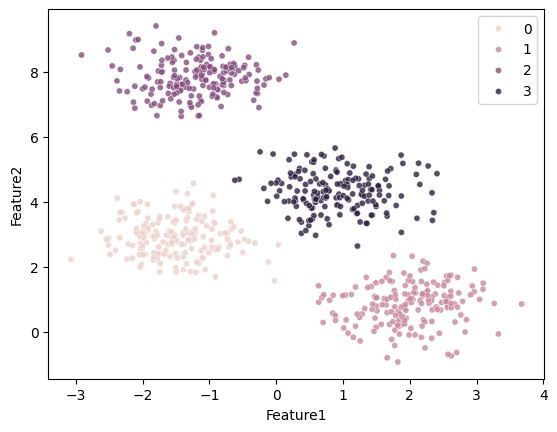

In [77]:
df = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
sns.scatterplot(data=df, x=df.Feature1, y=df.Feature2, hue=clusters, s=20, alpha=0.8)

# 3. Report two comparisons

* summary: I think both the custom KMeans and scikit-learn's KMeans have identified very similar centroids for the clusters,
  which represent the center of mass for each cluster, The centroids are identical to the floating-point, suggests both
  implementations are converging to the same solution and have performed similarly well in terms of identifying the cluster
  centers within the data.
* Comparison 1: Custom Implementation vs. Expected Values in cluster_assignments
    * The homogeneity score is 0.9936442712074952 for my KMeans implementation, which is very close to 1. This indicates
      that the clusters predicted by my KMeans implementation match almost with the true cluster expectation. so I think i
      can summarize the implemented KMeans version is effective and accurate in its clustering predictions.
* Comparison 2: Scikit-learn Implementation vs. Expected Values in cluster_assignments
    * The homogeneity score is 0.9936442712074952 for my Sciki-learn implementation, which is very close to 1. This indicates
      that the clusters predicted by Sciki-learn implementation match almost with the true cluster expectation. so we can summarize the
      Sciki-learn version is effective and accurate in its clustering predictions.
* Comparison 3: Custom Implementation vs. scikit-learn’s Implementation
    * from the scatter graph of cluster distribution, both plots show a very similiar distribution of data points across the
      clusters, which reinforce the conclusion that the customer KMeans and scikit-learn’s KMeans perform equally well
      on this dataset. Besides from the clusters centrioids we can tell both are very similiar as well. Additional, both the
      homogeneity score the custom and scikit-learn KMeans is 0.9936442712074952,it implies that the homogeneity
      score between the custom implementation's clusters and scikit-learn’s labels would also be very high, potentially
      identical, assuming no variations have occurred in the dataset or clustering initialization, means we can conclude
      The custom KMeans implementation is as accurate as the scikit-learn’s implementation potentially.

# Choose and run clustering algorithms
    * KMeans
    * Hierarchical

* Chicago Taxi Data

In [84]:
df = pd.read_csv('Taxi_Trips__2013-2023_.csv')
df

,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,...,Extras,Trip Total,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
0,52dc9029821e61db30a51838cb3cd711bd0e03cb,275f3f891b8c0ba8f2958873f850d2a03993c99f5f79f6...,02/01/2023 12:15:00 AM,02/01/2023 12:30:00 AM,1140.0,11.20,NaN,NaN,76.0,NaN,...,21.0,49.75,Cash,4053 - 40193 Adwar H. Nikola,41.980264,-87.913625,POINT (-87.913624596 41.9802643146),NaN,NaN,NaN
1,11eeb6710caa0606028c7ba025bfa18c277886e8,6c87f1d023a9d7146ae81b6aa4648bf98cec52cceb9f08...,02/01/2023 12:15:00 AM,02/01/2023 12:15:00 AM,660.0,2.70,NaN,NaN,32.0,7.0,...,0.0,13.00,Credit Card,Taxi Affiliation Services,41.878866,-87.625192,POINT (-87.6251921424 41.8788655841),41.922686,-87.649489,POINT (-87.6494887289 41.9226862843)
2,113aa7bf346c585bb941cda2d5c0015c8a1472f0,bb4e75d3065311c33024a434640731c43fd2cf9e4482eb...,02/01/2023 12:15:00 AM,02/01/2023 12:30:00 AM,480.0,0.00,NaN,NaN,8.0,24.0,...,0.0,9.75,Credit Card,Taxi Affiliation Services,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.901207,-87.676356,POINT (-87.6763559892 41.9012069941)
3,2503e3944e5c82b89638447ad361638111129375,57c40509cae37a0e5e536a657cdb7f8c6824314bc466a7...,02/01/2023 12:15:00 AM,02/01/2023 12:45:00 AM,1620.0,0.00,1.703198e+10,NaN,76.0,NaN,...,28.0,91.00,Credit Card,Taxi Affiliation Services,41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),NaN,NaN,NaN
4,23ddcfba2ad714fe0303909961ea74873be50da2,40720025b84fa778c47d6637db01b1d8f2de2eabafa529...,02/01/2023 12:15:00 AM,02/01/2023 12:15:00 AM,360.0,0.10,NaN,NaN,76.0,NaN,...,4.0,13.75,Cash,Taxi Affiliation Services,41.980264,-87.913625,POINT (-87.913624596 41.9802643146),NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101783,9209df4c3541198fda3173a226f2df619a806022,dee6032433df09fe8d3fd4fa958380308c902dc98f81c3...,02/07/2023 11:45:00 PM,02/07/2023 11:45:00 PM,760.0,2.69,1.703183e+10,1.703132e+10,28.0,32.0,...,0.0,10.90,Mobile,Medallion Leasin,41.885281,-87.657233,POINT (-87.6572331997 41.8852813201),41.884987,-87.620993,POINT (-87.6209929134 41.8849871918)
101784,f0957a8f6bef37bb2872649fb3c76ad1a179acab,3f6562a2a18861cf21a21101c14cc91dd7c4d72cdce80f...,02/07/2023 11:45:00 PM,02/07/2023 11:45:00 PM,4.0,0.00,NaN,NaN,8.0,8.0,...,0.0,77.40,Credit Card,Chicago Independents,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.899602,-87.633308,POINT (-87.6333080367 41.899602111)
101785,4cb74df671cfccceb9b592f347ef1a94c1540c7a,b31f46efa11263565e3dba91f26ff96b74516e8108ac56...,02/14/2023 10:30:00 AM,02/14/2020 06:00:00 PM,NaN,2.90,NaN,NaN,8.0,24.0,...,0.0,13.50,Cash,Taxi Affiliation Services,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.901207,-87.676356,POINT (-87.6763559892 41.9012069941)
101786,7f24c5101df65952ef318f558b8b071989ff7c17,65057dc10e707a18a32bc4371c5db0b828e90f9caf1068...,04/27/2023 11:15:00 AM,04/21/2019 09:30:00 PM,NaN,15.10,NaN,NaN,76.0,7.0,...,4.0,52.90,Credit Card,Taxi Affiliation Services,41.980264,-87.913625,POINT (-87.913624596 41.9802643146),41.922686,-87.649489,POINT (-87.6494887289 41.9226862843)


* first we do EDA, to do data quality report, look for any missing out

In [85]:
df.describe()

,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,Tips,Tolls,Extras,Trip Total,Pickup Centroid Latitude,Pickup Centroid Longitude,Dropoff Centroid Latitude,Dropoff Centroid Longitude
count,101763.000000,101788.000000,3.517900e+04,3.505400e+04,95650.000000,92192.000000,101681.000000,101681.000000,101681.000000,101681.000000,101681.000000,95657.000000,95657.000000,92489.000000,92489.000000
mean,1102.644891,6.021135,1.703149e+10,1.703140e+10,33.230946,25.300764,20.466054,2.452347,0.014503,1.679117,24.739358,41.898703,-87.689956,41.892116,-87.657546
std,1831.031101,7.572349,3.696445e+05,3.377955e+05,25.309183,20.270499,18.103452,3.918353,0.602782,5.208910,22.641634,0.064621,0.104274,0.059306,0.063430
min,0.000000,0.000000,1.703101e+10,1.703101e+10,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.660136,-87.913625,41.660136,-87.913625
25%,420.000000,0.870000,1.703108e+10,1.703108e+10,8.000000,8.000000,7.750000,0.000000,0.000000,0.000000,9.500000,41.878866,-87.695013,41.878866,-87.663518
50%,836.000000,2.600000,1.703132e+10,1.703132e+10,32.000000,28.000000,13.500000,0.000000,0.000000,0.000000,16.000000,41.895033,-87.642649,41.892508,-87.633308
75%,1516.000000,10.800000,1.703184e+10,1.703184e+10,50.000000,32.000000,31.000000,3.000000,0.000000,1.000000,33.900000,41.949829,-87.626211,41.922686,-87.625192
max,86003.000000,814.300000,1.703198e+10,1.703198e+10,77.000000,77.000000,999.000000,250.000000,78.000000,182.000000,999.000000,42.015934,-87.534903,42.021224,-87.534903


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101788 entries, 0 to 101787
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Trip ID                     101788 non-null  object 
 1   Taxi ID                     101779 non-null  object 
 2   Trip Start Timestamp        101788 non-null  object 
 3   Trip End Timestamp          101788 non-null  object 
 4   Trip Seconds                101763 non-null  float64
 5   Trip Miles                  101788 non-null  float64
 6   Pickup Census Tract         35179 non-null   float64
 7   Dropoff Census Tract        35054 non-null   float64
 8   Pickup Community Area       95650 non-null   float64
 9   Dropoff Community Area      92192 non-null   float64
 10  Fare                        101681 non-null  float64
 11  Tips                        101681 non-null  float64
 12  Tolls                       101681 non-null  float64
 13  Extras        

In [133]:
# First, drop columns only leave 'Pickup Centroid Latitude' and 'Pickup Centroid Longitude'
pickup_dropoff_columns = ['Pickup Centroid Latitude', 'Pickup Centroid Longitude']
pickup__dropoff_df = df[pickup_dropoff_columns]

pickup__dropoff_df

,Pickup Centroid Latitude,Pickup Centroid Longitude
0,41.980264,-87.913625
1,41.878866,-87.625192
2,41.899602,-87.633308
3,41.979071,-87.903040
4,41.980264,-87.913625
...,...,...
101783,41.885281,-87.657233
101784,41.899602,-87.633308
101785,41.899602,-87.633308
101786,41.980264,-87.913625


In [134]:
# clean pick up data and remove all the missing value
df_clean = pickup__dropoff_df.dropna().reset_index(drop=True)
df_clean

,Pickup Centroid Latitude,Pickup Centroid Longitude
0,41.980264,-87.913625
1,41.878866,-87.625192
2,41.899602,-87.633308
3,41.979071,-87.903040
4,41.980264,-87.913625
...,...,...
95652,41.878866,-87.625192
95653,41.885281,-87.657233
95654,41.899602,-87.633308
95655,41.899602,-87.633308


In [135]:
df_clean.corr(numeric_only=True)

,Pickup Centroid Latitude,Pickup Centroid Longitude
Pickup Centroid Latitude,1.000000,-0.587282
Pickup Centroid Longitude,-0.587282,1.000000


* from the correlation between Pickup Centroid Latitude and Dropoff Centroid Latitude, we can see a strong negative correlation as value of one variable increases, the value of the other variable decreases in a directly proportional manner.

# data quality evaluation report

* 2 columns / features: Pickup Centroid Latitude, Pickup Centroid Longitude
* strong positive correlation between Pickup Centroid Latitude and Dropoff Centroid Latitude
* there's some missing data on There are missing values in Pickup Census Tract, Dropoff Census Tract, 
        Pickup Community Area, Dropoff Community Area, and the location-related fields

# Find & Plot KMeans Cluster 

In [157]:
from sklearn.preprocessing import StandardScaler
# data is being normalized
ss = StandardScaler()
ss.fit(df_clean.iloc[:])
norm_data = ss.transform(df_clean.iloc[:])
norm_data

array([[ 1.26216408, -2.14503019],
       [-0.30698521,  0.62109854],
       [ 0.01391335,  0.54326538],
       ...,
       [ 0.01391335,  0.54326538],
       [ 0.01391335,  0.54326538],
       [ 1.26216408, -2.14503019]])

In [158]:
# fit the normalized data into KMeans
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, n_init=10, max_iter=300)
kmeans.fit(norm_data)

KMeans(n_clusters=4, n_init=10)

In [159]:
kmeans.cluster_centers_

array([[-0.18862972,  0.51512109],
       [ 1.25384091, -2.07558458],
       [-2.00371726,  0.3569758 ],
       [ 1.02751873,  0.11316592]])

In [160]:
ss.inverse_transform(kmeans.cluster_centers_)

array([[ 41.88651374, -87.63624273],
       [ 41.97972647, -87.9063833 ],
       [ 41.76922243, -87.652733  ],
       [ 41.96510149, -87.67815578]])

<Axes: xlabel='Pickup Centroid Latitude', ylabel='Pickup Centroid Longitude'>

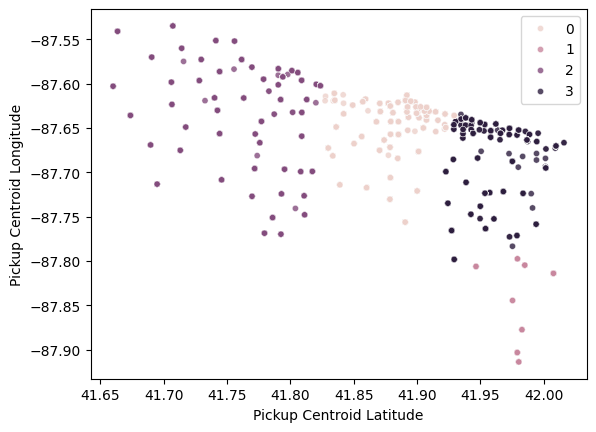

In [161]:
import matplotlib.pyplot as plt
sns.scatterplot(data=df_clean, x=df_clean['Pickup Centroid Latitude'], y=df_clean['Pickup Centroid Longitude'], hue=kmeans.labels_, s=20, alpha=0.8)


* this graph is mainly finding the cluster grouping for taxi pickup location in Chicago, using KMeans 
its a little bit hard to tell the cluster relationship since Kmeans is better for spherical cluster, 
and maybe i will use Hierarchical to demonstrate the grouping.

# Hierarchical Clustering

In [164]:
columns = ['Trip ID', 'Pickup Centroid Latitude', 'Pickup Centroid Longitude']
df_hier = df[columns]
df_hier

,Trip ID,Pickup Centroid Latitude,Pickup Centroid Longitude
0,52dc9029821e61db30a51838cb3cd711bd0e03cb,41.980264,-87.913625
1,11eeb6710caa0606028c7ba025bfa18c277886e8,41.878866,-87.625192
2,113aa7bf346c585bb941cda2d5c0015c8a1472f0,41.899602,-87.633308
3,2503e3944e5c82b89638447ad361638111129375,41.979071,-87.903040
4,23ddcfba2ad714fe0303909961ea74873be50da2,41.980264,-87.913625
...,...,...,...
101783,9209df4c3541198fda3173a226f2df619a806022,41.885281,-87.657233
101784,f0957a8f6bef37bb2872649fb3c76ad1a179acab,41.899602,-87.633308
101785,4cb74df671cfccceb9b592f347ef1a94c1540c7a,41.899602,-87.633308
101786,7f24c5101df65952ef318f558b8b071989ff7c17,41.980264,-87.913625


In [165]:
df_clean_hier = df_hier.dropna().reset_index(drop=True)
df_clean_hier

,Trip ID,Pickup Centroid Latitude,Pickup Centroid Longitude
0,52dc9029821e61db30a51838cb3cd711bd0e03cb,41.980264,-87.913625
1,11eeb6710caa0606028c7ba025bfa18c277886e8,41.878866,-87.625192
2,113aa7bf346c585bb941cda2d5c0015c8a1472f0,41.899602,-87.633308
3,2503e3944e5c82b89638447ad361638111129375,41.979071,-87.903040
4,23ddcfba2ad714fe0303909961ea74873be50da2,41.980264,-87.913625
...,...,...,...
95652,92882d146604aa4485de604e48f93b2ffd270027,41.878866,-87.625192
95653,9209df4c3541198fda3173a226f2df619a806022,41.885281,-87.657233
95654,f0957a8f6bef37bb2872649fb3c76ad1a179acab,41.899602,-87.633308
95655,4cb74df671cfccceb9b592f347ef1a94c1540c7a,41.899602,-87.633308


In [168]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [169]:
def leaf_label_function(index):
    return df_clean_hier.iloc[index, 0]

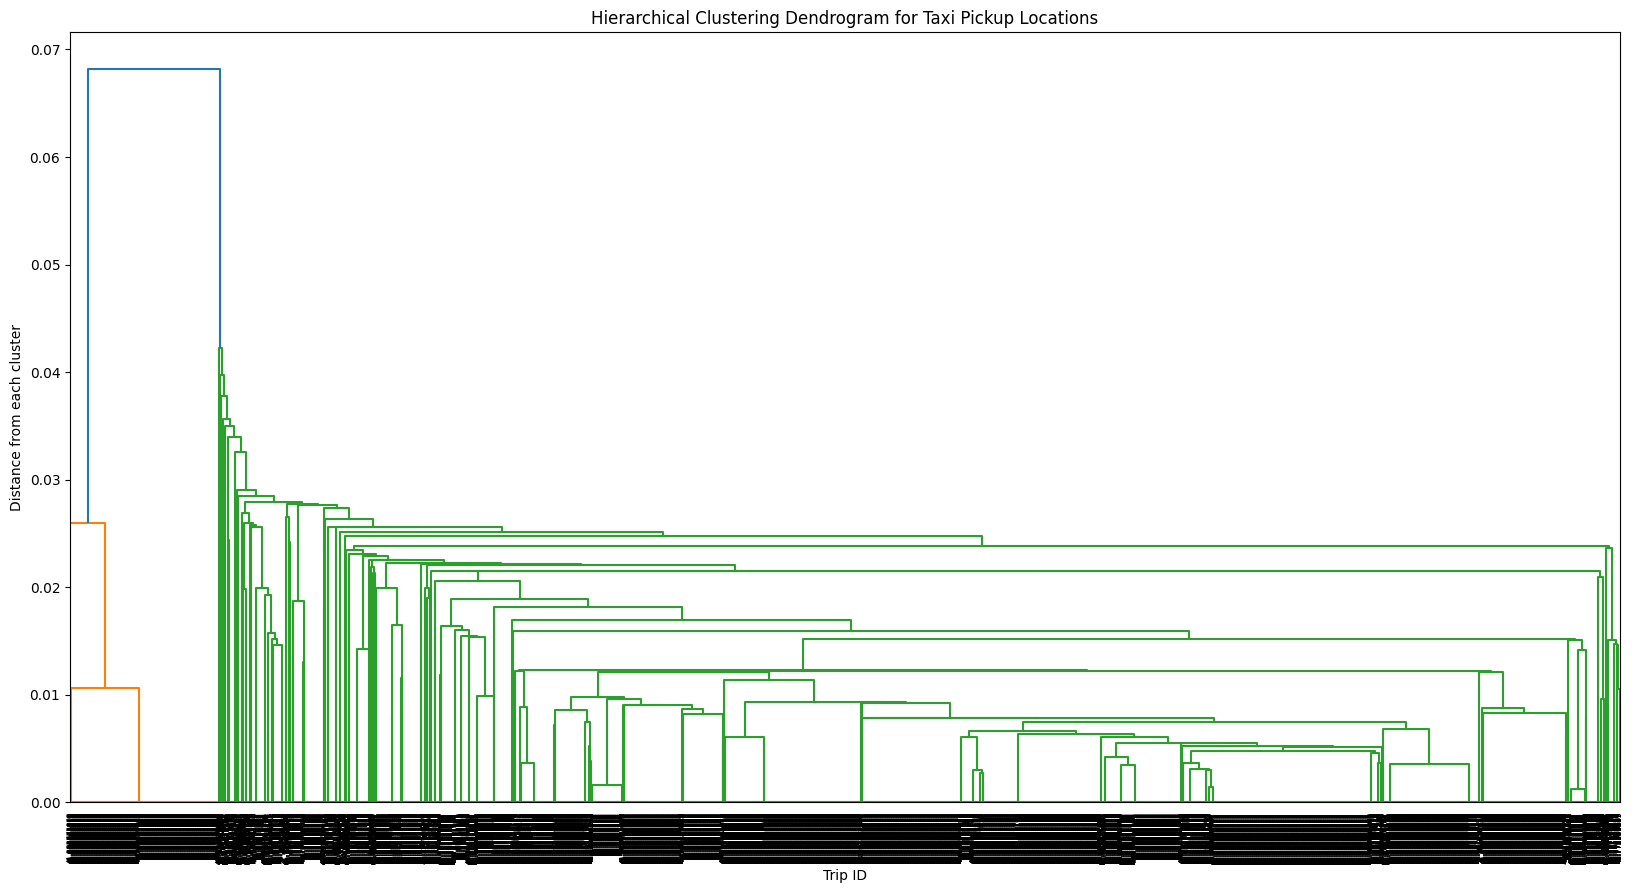

In [189]:
plt.figure(figsize=(20,10))
dend = dendrogram(linkage(df_clean_hier.iloc[:10000, -2:]), leaf_label_func=leaf_label_function)

plt.title('Hierarchical Clustering Dendrogram for Taxi Pickup Locations')
plt.xlabel('Trip ID')
plt.ylabel('Distance from each cluster')
plt.show()

# 1. The Reason for Choosing Hierarchical Clustering

* I think for the selected data, it is not visually feasible observe through KMeans since the cluster is not 
a circle shape. Also since we are measuring the variance between each pick up location, its better to use a
Agglomerative algorithms to group cluster into a dendrogram graph. And it is easier for pinpoint location to calculate the proximity between earch pair of cluster using complete linkage or average linkage.
* Also Hierarchical clustering provides a dendrogram,  a tree-like diagram that visually represents the arrangement and relative distances of clusters, this is better to observer for a non-circle cluster and very
useful in understanding the spatial distribution and grouping of taxi pickup locations
*  Unlike KMeans, hierarchical clustering doesn't require the number of clusters to be specified in advance
since it is geospatial data

# 2. Pre-processing of the Data or Any Hyperparameter Settings

* first I did data normalization before conduction cluster to makes sure all the features is on the same scale
because hierarchical clustering are sensitive to the scale of the data since these algorithms are using distance
measures to determine the similarity between data points
* Next I did a feature selection, only the geographical coordinates of pickup locations were  used for clustering, focusing the analysis on spatial patterns. also I selected only first 10000 instance since the original data is huge.
* Hyperparameter Settings: I am thinking to choose 'average' method for linkage criteria in hierarchical clustering to minimize the variance within each cluster, which is suitable for geographical data.

 # 3. Output from the Algorithm(s)

* The primary output is a dendrogram that illustrates how individual taxi trips are grouped 
into clusters based on their pickup locations since we are using distance measures to determine the similarity between data points, from the dendrogram, we can see each location with similiar latitude and longitude will be group into one cluster, then neighbor cluster will form to a larger cluster. and this dendrogram shows the hierarchical nature of these groupings and the relative distances between clusters

# 4. Metrics Used to Evaluate the Output and Performance

In [195]:
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_score

cluster_labels = fcluster(linkage(df_clean_hier.iloc[:100, -2:]), 4, criterion='maxclust')
silhouette_avg = silhouette_score(df_clean_hier.iloc[:100, -2:], cluster_labels)

silhouette_avg

0.8123929896286185

* I used Silhouette Score to evaluate the quality of the formed clusters by measuring how similar their pickup location as to its own cluster compared to other clusters. 
so In the context of taxi pickup locations, a Silhouette Score of 0.812 is considered very good, suggesting that the hierarchical clustering has successfully identified meaningful
and distinct geographic groupings, This high score indicates that, on average, taxi pickups within the same cluster are located near each other, while being far from pickups in other clusters. 
* What kind of performance did you get from that algorithm? I think the overall performance of hierarchical clustering is assessed by how accurately the generated clusters
represent meaningful groupings of taxi pickup locations. in this context with a high Silhouette Score 0.812, i think it indeed identified a meaningful cluster in dendrogram analysis and  
confirms that the clustering effectively captures the spatial patterns in taxi pickup data, and this indicates taxi pickups within the same cluster are located near each other, 
while being far from pickups in other clusters.
* Is that what you expected? I think with a high Silhouette Score and a clear dendrogram, the expectations from hierarchical clustering of taxi pickup data are met. Indeed it also indicates this algorithm's effectiveness in revealing the spatial of taxi pickup locations, guiding operational and strategic decisions in urban mobility services.

# Choose and run algorithms with second dataset

**Mopsi_data_subset**

In [19]:
df = pd.read_csv('Mopsi_data_subset.txt', sep="\t")
df

,625983,297439
0,626146,297440
1,626144,297456
2,626004,297394
3,626018,297437
4,626038,297518
...,...,...
13461,626042,297444
13462,625977,297443
13463,626050,297404
13464,625995,297426


* First we can do EAD analysis
    * first thing i spot is this data set is missing the columns features names, and first row are header currently. so it's hard to fully understand the data, and I guess "\t" acts as seperation between columns and each column maybe represents locations (latitude and longitude)or activities since the dataset is tracking routes around Finland. what I did is when importing the data I seperated dataset with "\t".
    * Another thing i spoted since the columns maybe represents the latitude and longitude of Finland, which has 61.xxxx degree N and 25.xxxx degree E so might need to devide our data by 10000;
    * Next step we can add columns and check if theres anything missing data values, outliers, and spot any pattern through visualization to understand the dataset more.

In [20]:
## first need to remove "\t" and add column names into dataset
## then devide latitude and longitude by 10000
df.columns = ["latitude", "longitude"]
df["latitude"] = df["latitude"] / 10000
df["longitude"] = df["longitude"] / 10000
df

,latitude,longitude
0,62.6146,29.7440
1,62.6144,29.7456
2,62.6004,29.7394
3,62.6018,29.7437
4,62.6038,29.7518
...,...,...
13461,62.6042,29.7444
13462,62.5977,29.7443
13463,62.6050,29.7404
13464,62.5995,29.7426


In [21]:
df.describe()

,latitude,longitude
count,13466.000000,13466.000000
mean,62.509471,28.900404
std,0.784462,2.040006
min,59.924700,21.201600
25%,62.593000,29.616000
50%,62.601800,29.744800
75%,62.619200,29.779675
max,69.783500,31.432800


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13466 entries, 0 to 13465
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   latitude   13466 non-null  float64
 1   longitude  13466 non-null  float64
dtypes: float64(2)
memory usage: 210.5 KB


* from above we can see there's no missing data

In [23]:
df.corr(numeric_only=True)

,latitude,longitude
latitude,1.000000,0.351542
longitude,0.351542,1.000000


* from the correlation between latitude and longitude, we can see they are positively correlatied. 

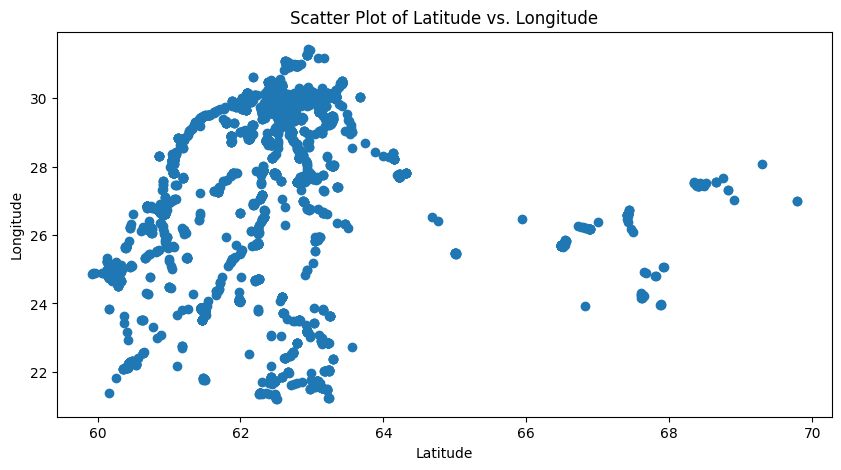

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(df['latitude'], df['longitude'])
plt.title('Scatter Plot of Latitude vs. Longitude')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

* above scatter graph help visualize the relationship between latitude and longitude, f many people are taking similar routes or if certain areas are more frequently traveled, these will emerge as denser clusters on the scatter plot, means latitude dear 62 and longitude near 29 is the routes that most people have traveled.

array([[<Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>]], dtype=object)

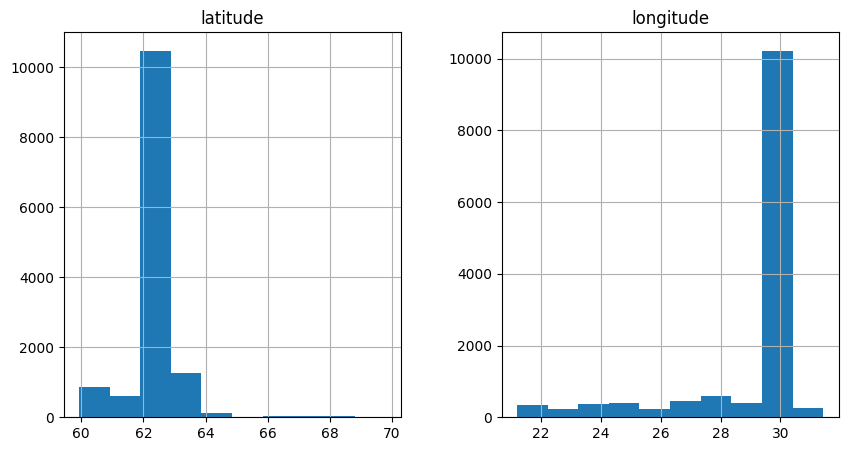

In [32]:
df.hist(figsize=(10, 5))
## we can see latitude and longitude are not very normally distributed

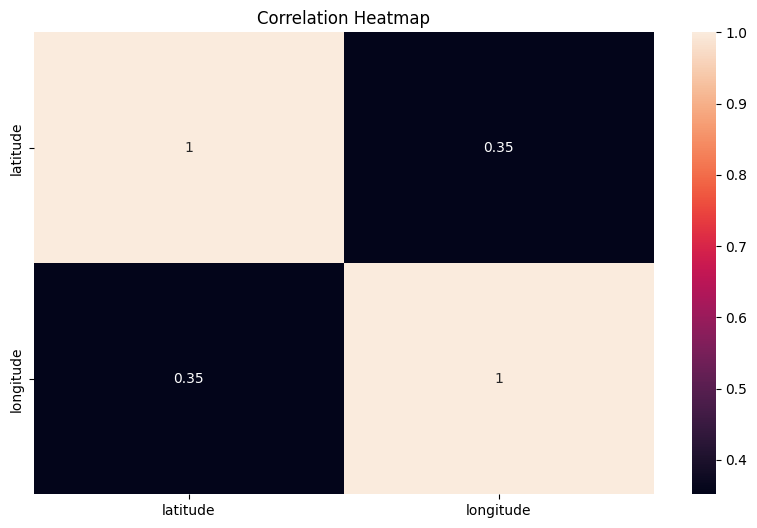

In [26]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

* from above heatmap, we can latitude and longitude are positively correlatied.

**data quality evaluation report**

* Dataset has 2 columns/features: Latitude and Longitude
* Theres's no missing data
* Positive correlation between Latitude and Longitude
* Original column/feature names missing and neeed to do some pre-processing to seperate the columns, and need to divied by a reference number to get correct latitude and longitude in order to display correct value format.
* Latitude and and Longitude itself is not normally distrubuted.
* Dataset has 13466 rows and 2 columns

**Find & Plot KMeans Cluster**

In [34]:
from sklearn.preprocessing import StandardScaler
# data is being normalized
ss = StandardScaler()
ss.fit(df.iloc[:])
norm_data = ss.transform(df.iloc[:])
norm_data

array([[0.13401914, 0.41354153],
       [0.13376418, 0.41432587],
       [0.11591689, 0.41128655],
       ...,
       [0.121781  , 0.41177677],
       [0.11476956, 0.41285523],
       [0.11311231, 0.41310034]])

In [35]:
# fit the normalized data into KMeans
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, n_init=10, max_iter=300)
kmeans.fit(norm_data)

KMeans(n_clusters=4, n_init=10)

In [36]:
kmeans.cluster_centers_

array([[-2.17437287, -1.83554245],
       [ 0.18410364,  0.37648618],
       [ 0.21674995, -2.98537268],
       [ 6.03384181, -1.37850927]])

In [37]:
kmeans.labels_

array([1, 1, 1, ..., 1, 1, 1])

In [38]:
# Next we can also calculate the Sciki-learn kmeans inertia which is the sim of distance square
# we can see this inertia is 4428 is a relatively high values which indicate bettwe clusters that are more dense and well seperated
kmeans.inertia_

4428.503225433021

In [47]:
# next we can try to figure out for Sciki-learn the optimal K values to best fitting the data into model
inertias = pd.DataFrame(data=[], index=range(2, 20), columns=['inertia'])
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(norm_data)
    inertias.loc[k] = kmeans.inertia_
inertias

,inertia
2,11541.323158
3,7747.470142
4,4428.535007
5,3497.143128
6,2791.628578
7,2200.319021
8,1694.150834
9,1366.583403
10,1446.798577
11,1171.759045


<Axes: title={'center': 'Inertia vs. K Values'}, xlabel='k values', ylabel='inertia'>

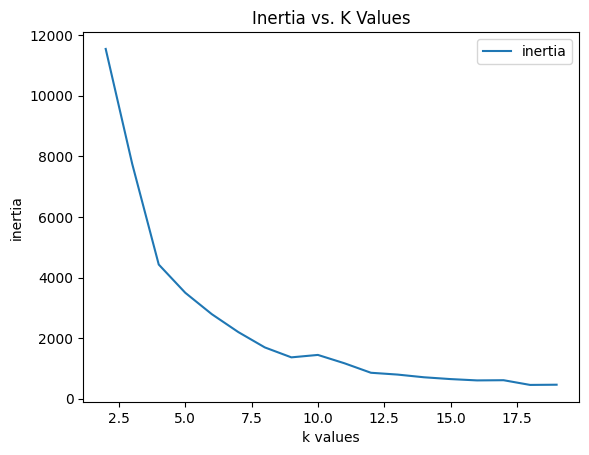

In [48]:
inertias.plot(title='Inertia vs. K Values', xlabel='k values', ylabel='inertia')

**from this inertia vs. K values graph we can see about after running Kmeans algorigthms 8 times, we have find our optimal clusters locations**

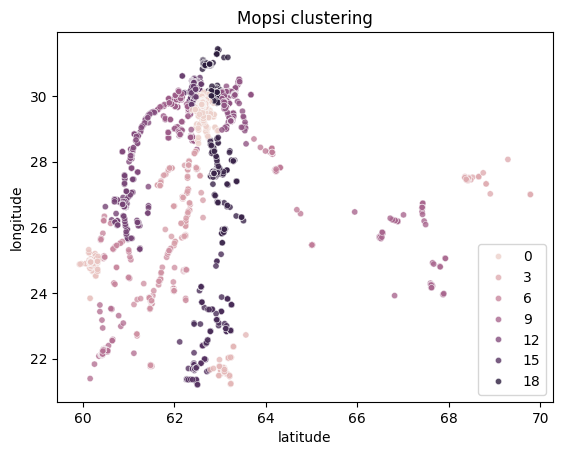

In [50]:
import matplotlib.pyplot as plt
sns.scatterplot(data=df, x=df['latitude'], y=df['longitude'], hue=kmeans.labels_, s=20, alpha=0.8)
plt.title('Mopsi clustering')
plt.show()

**Reason why I use KMeans algorithms**
* KMeans is easy to use and helps find patterns in data without needing much labels.
* it tells us meaningful info by grouping similar data together as clusters.
* we can figure out the best number of groups(k) by checking when changes get small (elbow method).
* it's a common method, so there's a lot of guides and support available.
* KMeans can make complex data simpler to understand by organizing it into clusters.

**Pre-processing of the Data or Any Hyperparameter Settings**
* I sperated the columns into 2 features by removing the "\t"
* Added column names Latitude and Longitude
* Divided the data values for each column to get to correct decimal format
* normalized the data for KMeans processing to makes sure all the features is on the same scale

**Output from the Algorithm(s)**
* The above KMeans scatter graph is mainly used for finding the cluster grouping of traveled routes in Finland, using KMeans is a little bit hard to tell the cluster relationship, since Kmeans is better for spherical cluster, and maybe will use DBSCAN to demonstrate the grouping can give a more comprehensive understanding.

**Metrics Used to Evaluate the Output and Performance**


In [53]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(norm_data, kmeans.labels_)
silhouette_avg

0.7628238691254423

* I use Silhouette Score to measure the effectiveness of the KMeans clustering, focusing on how well each data point fits within its cluster compared to other clusters. and I get a Silhouette Score of 0.7628 indicates a strong performance of the KMeans algorithm, suggesting that it has effectively distinguished between different groupings within the data.
* This high score indicates data points within a cluster are closer to each other than to those in different clusters, highlighting the algorithm's ability to capture meaningful patterns.
* Given the score, it's clear that the KMeans clustering has successfully identified cohesive groupings, indicating that data points within the same cluster share a high degree of similarity.
* This outcome also meets expectations for KMeans clustering, demonstrating ability able to find distinct and significant patterns within the dataset.

**Find & Plot DBSCAN**

In [54]:
from sklearn.cluster import DBSCAN
import seaborn as sns
import matplotlib.pyplot as plt

dbscan = DBSCAN(eps=0.3, min_samples=10) ## initialize DBSCAN
dbscan.fit(norm_data) 

DBSCAN(eps=0.2)

In [56]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

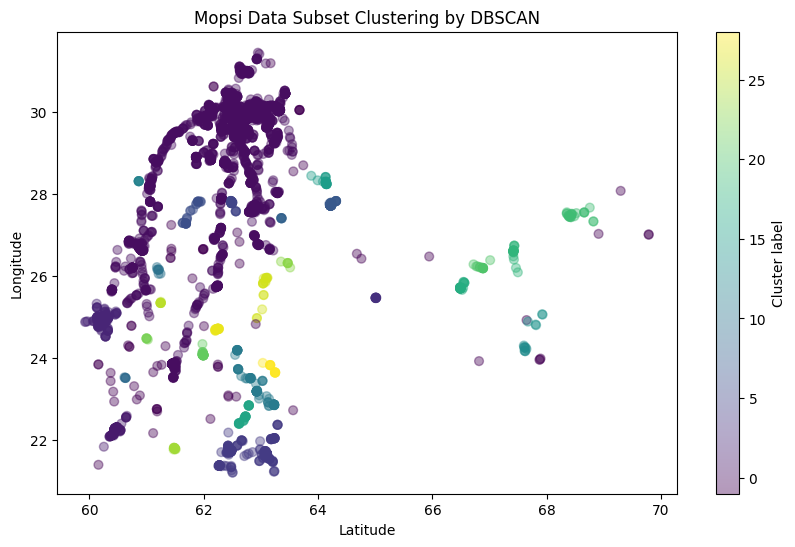

In [68]:
plt.figure(figsize=(10, 6))
plt.scatter(df['latitude'], df['longitude'], c=dbscan.labels_, s=40, alpha=0.4)
plt.title('Mopsi Data Subset Clustering by DBSCAN')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.colorbar(label='Cluster label')
plt.show()

**Reason why I use DBSCAN algorithms**
* DBSCAN can find clusters of any shape, not just circles like KMeans algorithms, which makes it great for geolocational data.* 
It works well eve with outliers) in the data,DBSCAN help us to seperateg these from the main clusters, which helps in identifying clear groupse* .
It's good for identifying outliers or unusual data points, because can it laels points that don't fit into any cluster as noi So its easy to understand the cluster visually.s* e.
DBSCAN is straightforward to use with just a couple of parameters (eps and min_samples), making it easier to apply without needcomplexcate s.nts.

**Pre-processing of the Data or Any Hyperparameter Settings**

* Normalized the data, I made sure "latitude" and "longitude" are equally important by adjusting their scales. This helps in correctly grouping similar items
* Choosing Nearby Points (eps): I set a rule that if two points are closer than a tiny distance (0.3 units), they're considered neighbors.
* Deciding on Group Size (min_samples): I decided that a group needs at least 10 points to be called a cluster. This rule helps us ignore small, random gatherings and focus on significant groups.

**Output from the Algorithm(s)**
* Clusters: The colors on the plot show different groups or clusters where points are close together, meaning DBSCAN found areas with lots of data points as clusters.* 
Outliers: Points that don't fit into any cluste  is  colored differently, showing they're outlier, which are  points that are too far from others to belong to any group.
* 
Patterns: The plot helps us see where points cluster on the mapindicating the data points that are in the same clusterar, based on how we're measuring things like latitude and longitude.

**Metrics Used to Evaluate the Output and Performance**


In [70]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(norm_data, dbscan.labels_)
silhouette_avg

0.44313937287682786

* I use Silhouette Score to measure the effectiveness of DBSCAN clustering, focusing on how well each data point fits within its cluster compared to other clusters
* we calculated a silhouette score (0.443) that tells us how well the data points fit into their groups, which is below KMeans score. and a score closer to 1 means a better fit.
* the score of 0.443 suggests our groups make some sense, but there's room for improvement. It means some points might not fit perfectly in their groups